<a href="https://colab.research.google.com/github/XaviCarrera/r-estad-stica/blob/main/Regresi%C3%B3nLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial de Regresión Lineal en R
En este tutorial aprenderemos los conceptos básicos de la regresión lineal en R.

Usaremos el dataset `mtcars`, el cual contiene datos sobre el consumo de combustible y otras características de automóviles.
Exploraremos los siguientes temas:
- Covarianza
- Correlación
- Regresión Lineal Simple
- Regresión Lineal Múltiple
- Interpretación de resultados
- Evaluación del desempeño del modelo


In [1]:
library(tidyverse)
library(ggplot2)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Carga del dataset `mtcars`

Este dataset contiene información sobre automóviles, como el consumo de combustible, peso y potencia.

In [3]:
data(mtcars)

head(mtcars)
dim(mtcars)
summary(mtcars)
str(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


[1] 32 11

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


# Covarianza

La covarianza mide cómo dos variables cambian juntas. Si la covarianza es positiva, las variables tienden a aumentar juntas. Si es negativa, una aumenta mientras la otra disminuye.

In [4]:
cov(mtcars$mpg, mtcars$hp)

[1] -320.7321

# Correlación
La correlación mide la relación entre dos variables en una escala normalizada (-1 a 1).
Una correlación cercana a 1 indica una relación positiva fuerte, -1 una relación negativa fuerte, y 0 indica que no hay relación.

In [5]:
cor(mtcars$mpg, mtcars$hp)

[1] -0.7761684

# Regresión Lineal Simple
En una regresión lineal simple, modelamos la relación entre una variable dependiente y una variable independiente.

Ejemplo: predecir `mpg` en función de `hp`.

In [6]:
modelo_simple <- lm(mpg ~ hp, data=mtcars)
summary(modelo_simple)


Call:
lm(formula = mpg ~ hp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.09886    1.63392  18.421  < 2e-16 ***
hp          -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


## Modelo

**Intersección (Intercept)**:
30.10 es el valor estimado del consumo de combustible (
𝑚
𝑝
𝑔
mpg) cuando la variable independiente
ℎ𝑝
(caballos de fuerza) es 0.

**Coeficiente de hp**:
−0.0682 indica que, en promedio, por cada unidad adicional de
ℎ
𝑝
hp, el
𝑚
𝑝
𝑔
mpg disminuye en
0.0682.

## Coeficientes

**Intercept (30.10, p < 2e-16)**: Esto indica que cuando
ℎ
𝑝
=
0
, el consumo de combustible estimado es de aproximadamente 30.10 mpg. Aunque en la realidad un auto con
ℎ
𝑝
=
0
hp=0 no tiene sentido, esto representa la extrapolación del modelo.

**Pendiente de hp (-0.0682, p = 1.79e-07)**: El coeficiente negativo sugiere que existe una relación inversa entre los caballos de fuerza y el consumo de combustible. Es decir, a mayor potencia del motor, menor es el rendimiento de millas por galón.

## Residuos

**Min**: -5.71, Max: 8.23: Indican que el modelo tiene errores de predicción en un rango de aproximadamente -5.71 a +8.23 millas por galón.

**Mediana** cercana a 0 sugiere que los errores están distribuidos alrededor de 0.

**Residual Standard Error (3.863)**: Indica la desviación estándar de los errores residuales, es decir, cuánto se desvían en promedio los valores reales de los valores predichos.


# Visualización del modelo de regresión lineal simple

`geom_smooth()` using formula = 'y ~ x'


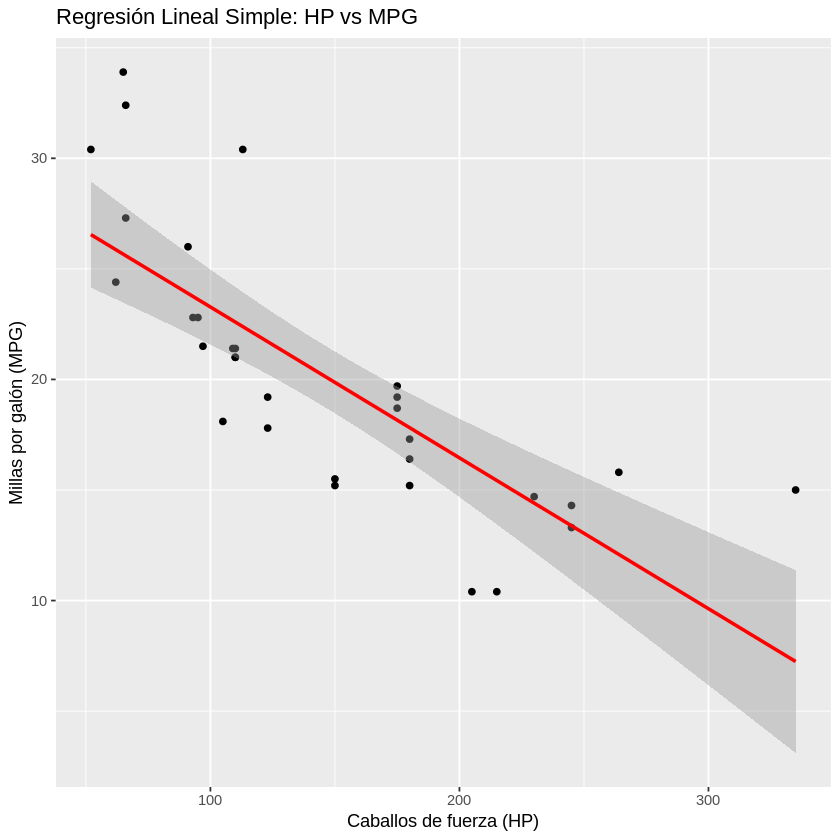

In [7]:
ggplot(mtcars, aes(x = hp, y = mpg)) +
  geom_point() +
  geom_smooth(method = "lm", col = "red") +
  labs(title = "Regresión Lineal Simple: HP vs MPG", x = "Caballos de fuerza (HP)", y = "Millas por galón (MPG)")

# Regresión Lineal Múltiple

En una regresión lineal múltiple, usamos múltiples variables independientes para predecir la variable dependiente.

Ejemplo: predecir `mpg` en función de `hp`, `wt` y `cyl`.

In [8]:
modelo_multiple <- lm(mpg ~ hp + wt + cyl, data=mtcars)
summary(modelo_multiple)


Call:
lm(formula = mpg ~ hp + wt + cyl, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9290 -1.5598 -0.5311  1.1850  5.8986 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 38.75179    1.78686  21.687  < 2e-16 ***
hp          -0.01804    0.01188  -1.519 0.140015    
wt          -3.16697    0.74058  -4.276 0.000199 ***
cyl         -0.94162    0.55092  -1.709 0.098480 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.512 on 28 degrees of freedom
Multiple R-squared:  0.8431,	Adjusted R-squared:  0.8263 
F-statistic: 50.17 on 3 and 28 DF,  p-value: 2.184e-11


# Evaluación del Modelo
Para medir el desempeño de un modelo, utilizamos métricas como R² y el error cuadrático medio.

In [9]:
deparse(substitute(modelo_simple))
summary(modelo_simple)$r.squared
summary(modelo_multiple)$r.squared

[1] "modelo_simple"

[1] 0.6024373

[1] 0.84315

R2(0.6024): Explica qué porcentaje de la variabilidad de
𝑚
𝑝
𝑔
mpg es explicada por
ℎ
𝑝. En este caso, el 60.24% de la variabilidad en
𝑚𝑝𝑔
 puede ser explicada por la variable
ℎ𝑝, lo que indica una relación moderada.

In [10]:
predicciones <- predict(modelo_multiple, mtcars)
rmse <- sqrt(mean((mtcars$mpg - predicciones)^2))
rmse

[1] 2.349338